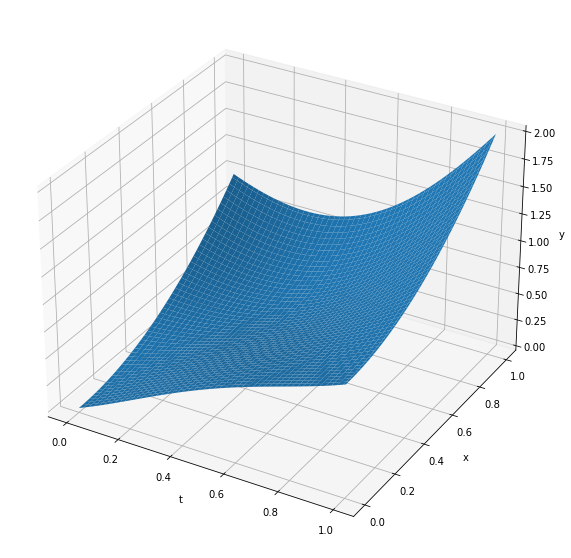

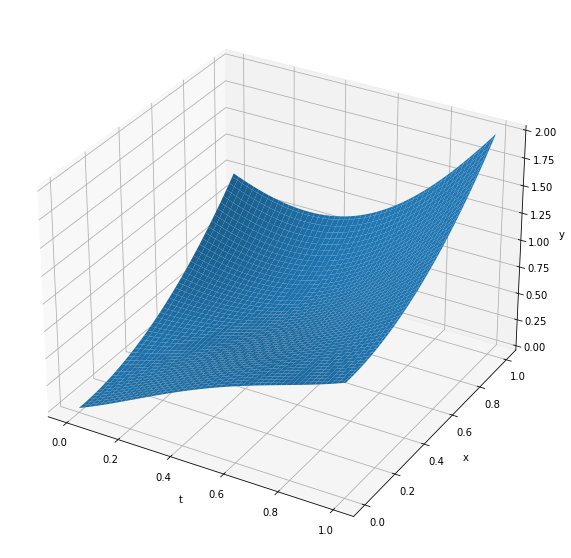

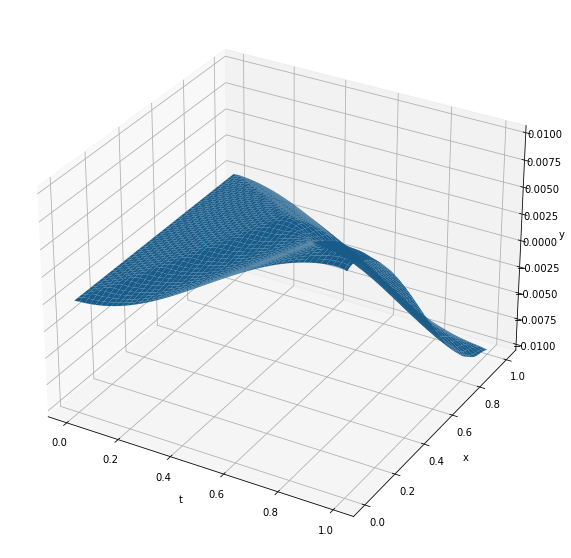

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import math

pi = 3.1415926535
N = 100
M = 100
h = 1/(N-1)
tau = 1/(M-1)
s = 0.2
x = np.linspace(0,1,N)
t = np.linspace(0,1,M)
y = np.zeros((N,M))

alpha = np.zeros(N)
bet = np.zeros(N)

y[:,0] = x**2

for i in range(1,N-1):
    y[i,1] = y[i,0] + tau*np.cos(pi*x[i])
y[0,1], y[N-1,1] = y[1,1], y[N-2,1] + 2*tau

A = s*tau**2/h**2
B = s*tau**2/h**2
C = 1 + 2*s*tau**2/h**2

for j in range(1,M-1):
    alpha[0] = 1
    bet[0] = 0
    for i in range(1,N-1):
        F = tau**2*(s*(y[i+1,j-1]-2*y[i,j-1]+y[i-1,j-1])/h**2 + (1-2*s)*(y[i+1,j]-2*y[i,j]+y[i-1,j])/h**2) + 2*y[i,j] - y[i,j-1]
        alpha[i]=B/(C-A*alpha[i-1])
        bet[i]=(A*bet[i-1]+F)/(C-A*alpha[i-1])
    bet[N-1] = (2*tau + bet[N-2])/(1-alpha[N-2])
    y[N-1,j+1] = bet[N-1]
    for i in reversed(range(N-1)):
        y[i, j+1] = alpha[i]*y[i+1, j+1]+bet[i]


fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('y')
t, x = np.meshgrid(t, x)
surf = ax.plot_surface(t, x, y)

def f(t,x):
    return x**2+t**2+np.sin(pi*t)*np.cos(pi*x)/pi

fig = plt.figure(figsize = (10, 10))
ax_1 = fig.add_subplot(1, 1, 1, projection = '3d')
ax_1.set_xlabel('t')
ax_1.set_ylabel('x')
ax_1.set_zlabel('y')
w = f(t,x)
surf_1 = ax_1.plot_surface(t, x, w)

fig = plt.figure(figsize = (10, 10))
ax_1 = fig.add_subplot(1, 1, 1, projection = '3d')
ax_1.set_xlabel('t')
ax_1.set_ylabel('x')
ax_1.set_zlabel('y')
surf_1 = ax_1.plot_surface(t, x, w-y)